# 01. Import Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import networkx as nx

# 02. Import Data

In [2]:
path = r'C:\Users\esteb\OneDrive\Desktop\2025_Credit Card Transaction Analysis'

In [3]:
df_transactions = pd.read_csv(os.path.join(path, '02_Data', 'Original Data', 'credit_card_transactions-ibm_v2.csv'))

In [4]:
df_card_info = pd.read_csv(os.path.join(path, '02_Data', 'Original Data', 'sd254_cards.csv'))

In [5]:
df_user_info = pd.read_csv(os.path.join(path, '02_Data', 'Original Data', 'sd254_users.csv'))

# 03. Data Summary

### Transaction Dataframe Summary

In [6]:
# Check Transactions Dataframe columns and data type
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24386900 entries, 0 to 24386899
Data columns (total 15 columns):
 #   Column          Dtype  
---  ------          -----  
 0   User            int64  
 1   Card            int64  
 2   Year            int64  
 3   Month           int64  
 4   Day             int64  
 5   Time            object 
 6   Amount          object 
 7   Use Chip        object 
 8   Merchant Name   int64  
 9   Merchant City   object 
 10  Merchant State  object 
 11  Zip             float64
 12  MCC             int64  
 13  Errors?         object 
 14  Is Fraud?       object 
dtypes: float64(1), int64(7), object(7)
memory usage: 2.7+ GB


In [7]:
# Check Transactions Dataframe numerical data's data accuracy
df_transactions.describe()

,User,Card,Year,Month,Day,Merchant Name,Zip,MCC
count,2.438690e+07,2.438690e+07,2.438690e+07,2.438690e+07,2.438690e+07,2.438690e+07,2.150876e+07,2.438690e+07
mean,1.001019e+03,1.351366e+00,2.011955e+03,6.525064e+00,1.571812e+01,-4.769230e+17,5.095644e+04,5.561171e+03
std,5.694612e+02,1.407154e+00,5.105921e+00,3.472355e+00,8.794073e+00,4.758940e+18,2.939707e+04,8.793154e+02
min,0.000000e+00,0.000000e+00,1.991000e+03,1.000000e+00,1.000000e+00,-9.222899e+18,5.010000e+02,1.711000e+03
25%,5.100000e+02,0.000000e+00,2.008000e+03,3.000000e+00,8.000000e+00,-4.500543e+18,2.837400e+04,5.300000e+03
50%,1.006000e+03,1.000000e+00,2.013000e+03,7.000000e+00,1.600000e+01,-7.946765e+17,4.674200e+04,5.499000e+03
75%,1.477000e+03,2.000000e+00,2.016000e+03,1.000000e+01,2.300000e+01,3.189517e+18,7.756400e+04,5.812000e+03
max,1.999000e+03,8.000000e+00,2.020000e+03,1.200000e+01,3.100000e+01,9.223292e+18,9.992800e+04,9.402000e+03


In [8]:
# Check Transactions Dataframe column count
df_transactions.count()

User              24386900
Card              24386900
Year              24386900
Month             24386900
Day               24386900
Time              24386900
Amount            24386900
Use Chip          24386900
Merchant Name     24386900
Merchant City     24386900
Merchant State    21666079
Zip               21508765
MCC               24386900
Errors?             388431
Is Fraud?         24386900
dtype: int64

In [9]:
# Check Transactions Dataframe first 30 entries
df_transactions.head(30)

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No
5,0,0,2002,9,3,13:53,$86.19,Swipe Transaction,-7146670748125200898,Monterey Park,CA,91755.0,5970,NaN,No
6,0,0,2002,9,4,05:51,$93.84,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
7,0,0,2002,9,4,06:09,$123.50,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
8,0,0,2002,9,5,06:14,$61.72,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
9,0,0,2002,9,5,09:35,$57.10,Swipe Transaction,4055257078481058705,La Verne,CA,91750.0,7538,NaN,No


In [10]:
#Print at most 20 Unique values in each object column of df_transactions
for col in df_transactions.select_dtypes(include="object"):
    print(f"\nUnique values in {col}:")
    print(df_transactions[col].unique()[:20])  # show up to 20 unique values


Unique values in Time:
['06:21' '06:42' '06:22' '17:45' '06:23' '13:53' '05:51' '06:09' '06:14'
 '09:35' '20:18' '20:41' '06:16' '06:34' '09:39' '06:10' '06:38' '13:48'
 '22:01' '06:54']

Unique values in Amount:
['$134.09' '$38.48' '$120.34' '$128.95' '$104.71' '$86.19' '$93.84'
 '$123.50' '$61.72' '$57.10' '$76.07' '$53.91' '$110.37' '$117.05'
 '$45.30' '$29.34' '$147.45' '$27.75' '$76.57' '$22.56']

Unique values in Use Chip:
['Swipe Transaction' 'Online Transaction' 'Chip Transaction']

Unique values in Merchant City:
['La Verne' 'Monterey Park' 'ONLINE' 'Mira Loma' 'Diamond Bar' 'San Diego'
 'Tilden' 'Lincoln' 'Ontario' 'Calexico' 'Chicago' 'Peoria'
 'Jefferson City' 'Waynesville' 'Bell Gardens' 'Playa Vista'
 'Manhattan Beach' 'Zurich' 'Massena' 'Fontanelle']

Unique values in Merchant State:
['CA' nan 'NE' 'IL' 'MO' 'Switzerland' 'IA' 'TX' 'Estonia' 'NJ' 'NV' 'NY'
 'Japan' 'AZ' 'UT' 'FL' 'MI' 'Mexico' 'WA' 'OH']

Unique values in Errors?:
[nan 'Technical Glitch' 'Insufficient B

#### Amount Fix for accuracy check

In [11]:
# Remove possible $ signs, commas, or spaces first
df_transactions['Amount'] = (
    df_transactions['Amount']
    .replace(r'[\$,]', '', regex=True)   # note the r'' prefix
    .astype(float))

In [12]:
# Check Transactions Dataframe amount column data accuracy
df_transactions['Amount'].describe()

count    2.438690e+07
mean     4.363401e+01
std      8.202239e+01
min     -5.000000e+02
25%      9.200000e+00
50%      3.014000e+01
75%      6.506000e+01
max      1.239050e+04
Name: Amount, dtype: float64

In [13]:
df_transactions[df_transactions['Amount'] < 0]

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
32,0,0,2002,9,11,13:17,-99.0,Swipe Transaction,2027553650310142703,Mira Loma,CA,91752.0,5541,NaN,No
72,0,0,2002,9,25,13:14,-100.0,Swipe Transaction,-1288082279022882052,La Verne,CA,91750.0,5499,NaN,No
116,0,0,2002,10,13,13:15,-99.0,Swipe Transaction,-1288082279022882052,La Verne,CA,91750.0,5499,NaN,No
122,0,0,2002,10,15,13:11,-88.0,Swipe Transaction,-4334232547381218591,Lincoln,NE,68521.0,5541,NaN,No
127,0,0,2002,10,16,11:54,-207.0,Swipe Transaction,7834055923142137930,Tilden,NE,68781.0,3395,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24386699,1999,1,2019,12,24,12:54,-237.0,Chip Transaction,-8566951830324093739,Muscle Shoals,AL,35661.0,3640,NaN,No
24386700,1999,1,2019,12,24,18:55,-233.0,Chip Transaction,-1612219785829480227,Huntsville,AL,35801.0,3387,NaN,No
24386723,1999,1,2019,12,28,22:20,-75.0,Chip Transaction,-5162038175624867091,Merrimack,NH,3054.0,5541,NaN,No
24386804,1999,1,2020,2,4,22:15,-70.0,Chip Transaction,2027553650310142703,Mooers Forks,NY,12959.0,5541,NaN,No


### Card Info Dataframe Summary

In [14]:
# Check Card Info Dataframe columns and data type
df_card_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   User                   6146 non-null   int64 
 1   CARD INDEX             6146 non-null   int64 
 2   Card Brand             6146 non-null   object
 3   Card Type              6146 non-null   object
 4   Card Number            6146 non-null   int64 
 5   Expires                6146 non-null   object
 6   CVV                    6146 non-null   int64 
 7   Has Chip               6146 non-null   object
 8   Cards Issued           6146 non-null   int64 
 9   Credit Limit           6146 non-null   object
 10  Acct Open Date         6146 non-null   object
 11  Year PIN last Changed  6146 non-null   int64 
 12  Card on Dark Web       6146 non-null   object
dtypes: int64(6), object(7)
memory usage: 624.3+ KB


In [15]:
# Check Card Info Dataframe numerical data's data accuracy
df_card_info.describe()

,User,CARD INDEX,Card Number,CVV,Cards Issued,Year PIN last Changed
count,6146.000000,6146.000000,6.146000e+03,6146.000000,6146.000000,6146.000000
mean,1003.477058,1.472502,4.820426e+15,506.220794,1.503091,2013.436707
std,571.724745,1.463294,1.328582e+15,289.431123,0.519191,4.270699
min,0.000000,0.000000,3.001055e+14,0.000000,1.000000,2002.000000
25%,508.250000,0.000000,4.486365e+15,257.000000,1.000000,2010.000000
50%,1004.000000,1.000000,5.108957e+15,516.500000,1.000000,2013.000000
75%,1493.750000,2.000000,5.585237e+15,756.000000,2.000000,2017.000000
max,1999.000000,8.000000,6.997197e+15,999.000000,3.000000,2020.000000


In [16]:
# Check Card Info Dataframe first 30 entries
df_card_info.head(30)

,User,CARD INDEX,Card Brand,Card Type,Card Number,Expires,CVV,Has Chip,Cards Issued,Credit Limit,Acct Open Date,Year PIN last Changed,Card on Dark Web
0,0,0,Visa,Debit,4344676511950444,12/2022,623,YES,2,$24295,09/2002,2008,No
1,0,1,Visa,Debit,4956965974959986,12/2020,393,YES,2,$21968,04/2014,2014,No
2,0,2,Visa,Debit,4582313478255491,02/2024,719,YES,2,$46414,07/2003,2004,No
3,0,3,Visa,Credit,4879494103069057,08/2024,693,NO,1,$12400,01/2003,2012,No
4,0,4,Mastercard,Debit (Prepaid),5722874738736011,03/2009,75,YES,1,$28,09/2008,2009,No
5,1,0,Visa,Credit,4404898874682993,09/2003,736,YES,1,$27500,09/2003,2012,No
6,1,1,Visa,Debit,4001482973848631,07/2022,972,YES,2,$28508,02/2011,2011,No
7,1,2,Mastercard,Debit,5627220683410948,06/2022,48,YES,2,$9022,07/2003,2015,No
8,1,3,Mastercard,Debit (Prepaid),5711382187309326,11/2020,722,YES,2,$54,06/2010,2015,No
9,1,4,Mastercard,Debit (Prepaid),5766121508358701,02/2023,908,YES,1,$99,07/2006,2012,No


In [17]:
# Check Card Info Dataframe total number of Unique users
df_card_info['User'].nunique()  

2000

#### Credit Limit

In [18]:
# Remove possible $ signs, commas, or spaces first
df_card_info['Credit Limit'] = (
    df_card_info['Credit Limit']
    .replace(r'[\$,]', '', regex=True)   # note the r'' prefix
    .astype(float))

In [19]:
df_card_info['Credit Limit'].describe()

count      6146.000000
mean      14347.493980
std       12014.463884
min           0.000000
25%        7042.750000
50%       12592.500000
75%       19156.500000
max      151223.000000
Name: Credit Limit, dtype: float64

### User Info Dataframe Summary

In [20]:
# Check User Info Dataframe columns and data type
df_user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Person                       2000 non-null   object 
 1   Current Age                  2000 non-null   int64  
 2   Retirement Age               2000 non-null   int64  
 3   Birth Year                   2000 non-null   int64  
 4   Birth Month                  2000 non-null   int64  
 5   Gender                       2000 non-null   object 
 6   Address                      2000 non-null   object 
 7   Apartment                    528 non-null    float64
 8   City                         2000 non-null   object 
 9   State                        2000 non-null   object 
 10  Zipcode                      2000 non-null   int64  
 11  Latitude                     2000 non-null   float64
 12  Longitude                    2000 non-null   float64
 13  Per Capita Income 

In [21]:
# Check User Info Dataframe numerical data's data accuracy
df_user_info.describe()

,Current Age,Retirement Age,Birth Year,Birth Month,Apartment,Zipcode,Latitude,Longitude,FICO Score,Num Credit Cards
count,2000.000000,2000.000000,2000.000000,2000.000000,528.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,45.391500,66.237500,1973.803000,6.439000,693.547348,50535.412000,37.389225,-91.554765,709.734500,3.073000
std,18.414092,3.628867,18.421234,3.565338,1897.157861,29359.754742,5.114324,16.283293,67.221949,1.637379
min,18.000000,50.000000,1918.000000,1.000000,1.000000,1060.000000,20.880000,-159.410000,480.000000,1.000000
25%,30.000000,65.000000,1961.000000,3.000000,5.000000,28214.250000,33.837500,-97.395000,681.000000,2.000000
50%,44.000000,66.000000,1975.000000,7.000000,10.000000,46305.500000,38.250000,-86.440000,711.500000,3.000000
75%,58.000000,68.000000,1989.000000,10.000000,95.250000,77086.250000,41.200000,-80.130000,753.000000,4.000000
max,101.000000,79.000000,2002.000000,12.000000,9940.000000,99508.000000,61.200000,-68.670000,850.000000,9.000000


In [22]:
# Check User Info Dataframe first 30 entries
df_user_info.head(30)

,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards
0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5
1,Sasha Sadr,53,68,1966,12,Female,3606 Federal Boulevard,NaN,Little Neck,NY,11363,40.76,-73.74,$37891,$77254,$191349,701,5
2,Saanvi Lee,81,67,1938,11,Female,766 Third Drive,NaN,West Covina,CA,91792,34.02,-117.89,$22681,$33483,$196,698,5
3,Everlee Clark,63,63,1957,1,Female,3 Madison Street,NaN,New York,NY,10069,40.71,-73.99,$163145,$249925,$202328,722,4
4,Kyle Peterson,43,70,1976,9,Male,9620 Valley Stream Drive,NaN,San Francisco,CA,94117,37.76,-122.44,$53797,$109687,$183855,675,1
5,Aldo Walker,42,70,1977,10,Male,58 Birch Lane,6.0,Davenport,IA,52803,41.55,-90.60,$20599,$41997,$0,704,3
6,Katalina Lewis,36,67,1983,12,Female,5695 Fifth Street,1.0,Louisville,KY,40299,38.22,-85.74,$25258,$51500,$102286,672,3
7,Ryland Howard,26,67,1993,12,Male,1941 Ninth Street,10.0,Portland,OR,97214,45.51,-122.64,$26790,$54623,$114711,728,1
8,Kenya Cooper,81,66,1938,7,Female,11 Spruce Avenue,NaN,Telford,PA,18969,40.32,-75.32,$26273,$42509,$2895,755,5
9,Sawyer Butler,34,60,1986,1,Female,887 Grant Street,NaN,Abbeville,LA,70510,29.97,-92.12,$18730,$38190,$81262,810,1


In [23]:
df_user_info.nunique()

Person                         1993
Current Age                      80
Retirement Age                   29
Birth Year                       80
Birth Month                      12
Gender                            2
Address                        1999
Apartment                       199
City                           1286
State                            51
Zipcode                        1815
Latitude                        989
Longitude                      1224
Per Capita Income - Zipcode    1754
Yearly Income - Person         1948
Total Debt                     1880
FICO Score                      321
Num Credit Cards                  9
dtype: int64

# 04. Wrangle Data

### Transaction Dataframe wrangle data

#### Fixing Columns

In [24]:
#Define exception
exceptions = {"MCC": "MCC"}

df_transactions.columns = [exceptions.get(col, col.lower().replace(" ", "_")) for col in df_transactions.columns]

In [25]:
# Rename Columns
df_transactions.rename(columns={"user": "user_id", "card": "card_index", "use_chip": "txn_type", "zip": "txn_zip_code",
                               "year":"txn_year", "month":"txn_month", "day":"txn_day", "time":"txn_time", "amount":"txn_amount"}, inplace=True)

In [26]:
# Changing zip_code column type to Int64 to display integers without .0 and keeps <NA>
df_transactions['txn_zip_code'] = df_transactions['txn_zip_code'].astype('Int64')

In [27]:
# Print df_transactions columns
print(df_transactions.columns)

Index(['user_id', 'card_index', 'txn_year', 'txn_month', 'txn_day', 'txn_time',
       'txn_amount', 'txn_type', 'merchant_name', 'merchant_city',
       'merchant_state', 'txn_zip_code', 'MCC', 'errors?', 'is_fraud?'],
      dtype='object')


#### Tackling (-) Amounts

In [28]:
# Create a new column named txn_flag indicating either a Purchase or Refund based on positive or negative values
df_transactions['txn_flag'] = df_transactions['txn_amount'].apply(
    lambda x: 'Refund' if x < 0 else 'Purchase')

In [29]:
# Get current column order
cols = df_transactions.columns.tolist()

In [30]:
# Remove txn_type from current position
cols.remove('txn_flag')

In [31]:
# Find index of txn_amount column
amount_idx = cols.index('txn_amount')

In [32]:
# Insert txn_flag right after Amount
cols.insert(amount_idx + 1, 'txn_flag')

In [33]:
# Reorder the dataframe
df_transactions = df_transactions[cols]

In [34]:
# Print df_transactions columns
print(df_transactions.columns)

Index(['user_id', 'card_index', 'txn_year', 'txn_month', 'txn_day', 'txn_time',
       'txn_amount', 'txn_flag', 'txn_type', 'merchant_name', 'merchant_city',
       'merchant_state', 'txn_zip_code', 'MCC', 'errors?', 'is_fraud?'],
      dtype='object')


#### Time Column

In [35]:
# Convert to datetime.time (keeps only the time)
df_transactions['txn_time'] = pd.to_datetime(df_transactions['txn_time'], format='%H:%M', errors='coerce').dt.time

In [36]:
# Count how many NaT values are in the 'time' column
num_missing = df_transactions['txn_time'].isna().sum()
print("Number of missing times:", num_missing)

Number of missing times: 0


####  Year, Month, Day

In [37]:
# Combine year, month, day into a datetime
df_transactions['txn_date'] = pd.to_datetime(
    df_transactions[['txn_year', 'txn_month', 'txn_day']].rename(columns={'txn_year': 'year', 'txn_month': 'month', 'txn_day': 'day'}))

In [38]:
# Move it right after 'day'
day_index = df_transactions.columns.get_loc('txn_day') 
df_transactions.insert(day_index + 1, 'txn_date', df_transactions.pop('txn_date'))

In [39]:
df_transactions.head()

,user_id,card_index,txn_year,txn_month,txn_day,txn_date,txn_time,txn_amount,txn_flag,txn_type,merchant_name,merchant_city,merchant_state,txn_zip_code,MCC,errors?,is_fraud?
0,0,0,2002,9,1,2002-09-01,06:21:00,134.09,Purchase,Swipe Transaction,3527213246127876953,La Verne,CA,91750,5300,NaN,No
1,0,0,2002,9,1,2002-09-01,06:42:00,38.48,Purchase,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754,5411,NaN,No
2,0,0,2002,9,2,2002-09-02,06:22:00,120.34,Purchase,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754,5411,NaN,No
3,0,0,2002,9,2,2002-09-02,17:45:00,128.95,Purchase,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754,5651,NaN,No
4,0,0,2002,9,3,2002-09-03,06:23:00,104.71,Purchase,Swipe Transaction,5817218446178736267,La Verne,CA,91750,5912,NaN,No


#### Tackling Missing zip_code

In [40]:
# Sample 30 rows where zipcode is missing
sample_missing_zips = df_transactions[df_transactions['txn_zip_code'].isna()].sample(30, random_state=42)

# Display the sample
sample_missing_zips[['merchant_city', 'merchant_state', 'txn_zip_code']]

,merchant_city,merchant_state,txn_zip_code
22283715,ONLINE,NaN,<NA>
10295357,ONLINE,NaN,<NA>
10639749,ONLINE,NaN,<NA>
10888607,ONLINE,NaN,<NA>
15347970,ONLINE,NaN,<NA>
17814462,ONLINE,NaN,<NA>
3680804,ONLINE,NaN,<NA>
7417148,ONLINE,NaN,<NA>
16581784,ONLINE,NaN,<NA>
23392284,ONLINE,NaN,<NA>


In [41]:
# Sample 30 rows where zipcode is missing, excluding Merchant City = 'ONLINE'
sample_missing_zips_online = df_transactions[
    df_transactions['txn_zip_code'].isna() & 
    (df_transactions['merchant_city'] != 'ONLINE')
].sample(30, random_state=42)

# Display the sample
sample_missing_zips_online[['merchant_city', 'merchant_state', 'txn_zip_code']]


,merchant_city,merchant_state,txn_zip_code
6316654,Helsinki,Finland,<NA>
23096207,Tokyo,Japan,<NA>
6373832,Cancun,Mexico,<NA>
23655523,Cancun,Mexico,<NA>
2512115,Geneva,Switzerland,<NA>
8045470,Santiago,Chile,<NA>
2782979,Cancun,Mexico,<NA>
2279484,Toronto,Canada,<NA>
11187617,Ho Chi Minh City,Vietnam,<NA>
880292,Bogota,Colombia,<NA>


#### States

In [42]:
# Show all unique states
unique_states = df_transactions['merchant_state'].unique()
print(unique_states)

['CA' nan 'NE' 'IL' 'MO' 'Switzerland' 'IA' 'TX' 'Estonia' 'NJ' 'NV' 'NY'
 'Japan' 'AZ' 'UT' 'FL' 'MI' 'Mexico' 'WA' 'OH' 'Dominican Republic' 'NM'
 'China' 'SC' 'AK' 'PA' 'VA' 'Portugal' 'HI' 'CT' 'MA' 'MN' 'CO' 'Italy'
 'GA' 'Philippines' 'Jamaica' 'AR' 'Canada' 'OR' 'WI' 'NC' 'France' 'WV'
 'Norway' 'ME' 'NH' 'VT' 'MD' 'AL' 'KY' 'TN' 'MS' 'New Zealand'
 'Netherlands' 'KS' 'ND' 'DC' 'Sierra Leone' 'Haiti' 'MT' 'South Korea'
 'Spain' 'OK' 'Algeria' 'Egypt' 'WY' 'ID' 'Indonesia' 'RI'
 'United Kingdom' 'Colombia' 'South Africa' 'IN' 'The Bahamas' 'Singapore'
 'Pakistan' 'Malaysia' 'Mongolia' 'Israel' 'Hong Kong' 'Guatemala' 'Peru'
 'Thailand' 'Sweden' 'Taiwan' 'LA' 'Germany' 'Czech Republic' 'India'
 'Poland' 'DE' 'Costa Rica' 'Denmark' 'Bangladesh' 'Macedonia' 'Nigeria'
 'SD' 'Tuvalu' 'Ireland' 'Vatican City' 'Lithuania' 'Papua New Guinea'
 'Belgium' 'Benin' 'Croatia' 'Saudi Arabia' 'Latvia' 'Austria' 'Slovenia'
 'Turkey' 'Russia' 'Greece' 'Slovakia' 'Brazil' 'Hungary' 'Argentina'
 'Se

In [43]:
# Define US states
us_states = [
    'AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA',
    'KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ',
    'NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT',
    'VA','WA','WV','WI','WY','DC'] 

In [44]:
#Define and Print Extra States
extra_states = [s for s in df_transactions['merchant_state'].unique() if s not in us_states]
print("Extra state(s):", extra_states)

Extra state(s): [nan, 'Switzerland', 'Estonia', 'Japan', 'Mexico', 'Dominican Republic', 'China', 'Portugal', 'Italy', 'Philippines', 'Jamaica', 'Canada', 'France', 'Norway', 'New Zealand', 'Netherlands', 'Sierra Leone', 'Haiti', 'South Korea', 'Spain', 'Algeria', 'Egypt', 'Indonesia', 'United Kingdom', 'Colombia', 'South Africa', 'The Bahamas', 'Singapore', 'Pakistan', 'Malaysia', 'Mongolia', 'Israel', 'Hong Kong', 'Guatemala', 'Peru', 'Thailand', 'Sweden', 'Taiwan', 'Germany', 'Czech Republic', 'India', 'Poland', 'Costa Rica', 'Denmark', 'Bangladesh', 'Macedonia', 'Nigeria', 'Tuvalu', 'Ireland', 'Vatican City', 'Lithuania', 'Papua New Guinea', 'Belgium', 'Benin', 'Croatia', 'Saudi Arabia', 'Latvia', 'Austria', 'Slovenia', 'Turkey', 'Russia', 'Greece', 'Slovakia', 'Brazil', 'Hungary', 'Argentina', 'Serbia', 'Ghana', 'Oman', 'United Arab Emirates', 'Finland', 'Barbados', 'Australia', 'Vietnam', 'Micronesia', 'Aruba', 'Liechtenstein', 'Cambodia', 'Kosovo', 'South Sudan', 'Luxembourg', '

In [45]:
# Create merchant_country column
df_transactions['merchant_country'] = np.where(
    df_transactions['merchant_state'].isin(us_states), 
    'USA', 
    df_transactions['merchant_state'])

In [46]:
# Fix merchant_state so it only has valid U.S. state codes
df_transactions['merchant_state'] = np.where(
    df_transactions['merchant_state'].isin(us_states), 
    df_transactions['merchant_state'], 
    np.nan)

In [47]:
# Get current column order
cols = list(df_transactions.columns)

In [48]:
# Remove the merchant_country column 
cols.remove('merchant_country')

In [49]:
# Insert merchant_country after merchant_state
merchant_state_index = cols.index('merchant_state')
cols.insert(merchant_state_index + 1, 'merchant_country')

In [50]:
# Reorder DataFrame
df_transactions = df_transactions[cols]

In [51]:
# Print df_transactions columns
print(df_transactions.columns)

Index(['user_id', 'card_index', 'txn_year', 'txn_month', 'txn_day', 'txn_date',
       'txn_time', 'txn_amount', 'txn_flag', 'txn_type', 'merchant_name',
       'merchant_city', 'merchant_state', 'merchant_country', 'txn_zip_code',
       'MCC', 'errors?', 'is_fraud?'],
      dtype='object')


In [52]:
# Check to view non USA countries
df_transactions[df_transactions['merchant_country'] != 'USA']

,user_id,card_index,txn_year,txn_month,txn_day,txn_date,txn_time,txn_amount,txn_flag,txn_type,merchant_name,merchant_city,merchant_state,merchant_country,txn_zip_code,MCC,errors?,is_fraud?
11,0,0,2002,9,5,2002-09-05,20:41:00,53.91,Purchase,Online Transaction,-9092677072201095172,ONLINE,NaN,NaN,<NA>,4900,NaN,No
24,0,0,2002,9,9,2002-09-09,20:02:00,144.90,Purchase,Online Transaction,-8338381919281017248,ONLINE,NaN,NaN,<NA>,4899,NaN,No
85,0,0,2002,9,30,2002-09-30,06:21:00,127.32,Purchase,Online Transaction,-7421093378627544099,ONLINE,NaN,NaN,<NA>,5311,NaN,No
99,0,0,2002,10,6,2002-10-06,06:14:00,139.39,Purchase,Online Transaction,-7421093378627544099,ONLINE,NaN,NaN,<NA>,5311,NaN,No
106,0,0,2002,10,9,2002-10-09,08:16:00,53.09,Purchase,Online Transaction,-4956618006720593695,ONLINE,NaN,NaN,<NA>,5193,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24386877,1999,1,2020,2,24,2020-02-24,20:04:00,55.79,Purchase,Online Transaction,-6160036380778658394,ONLINE,NaN,NaN,<NA>,4121,NaN,No
24386879,1999,1,2020,2,25,2020-02-25,07:06:00,43.08,Purchase,Online Transaction,-6160036380778658394,ONLINE,NaN,NaN,<NA>,4121,NaN,No
24386880,1999,1,2020,2,25,2020-02-25,07:34:00,43.76,Purchase,Online Transaction,-6160036380778658394,ONLINE,NaN,NaN,<NA>,4121,NaN,No
24386884,1999,1,2020,2,26,2020-02-26,07:43:00,45.18,Purchase,Online Transaction,-6160036380778658394,ONLINE,NaN,NaN,<NA>,4121,NaN,No


In [53]:
# Check to view non USA or NaN countries
df_transactions[
    (df_transactions['merchant_country'] != 'USA') & 
    (df_transactions['merchant_country'].notna())]

,user_id,card_index,txn_year,txn_month,txn_day,txn_date,txn_time,txn_amount,txn_flag,txn_type,merchant_name,merchant_city,merchant_state,merchant_country,txn_zip_code,MCC,errors?,is_fraud?
407,0,0,2003,2,24,2003-02-24,13:02:00,7.52,Purchase,Swipe Transaction,-727612092139916043,Zurich,NaN,Switzerland,<NA>,5411,NaN,No
408,0,0,2003,2,25,2003-02-25,06:46:00,36.97,Purchase,Swipe Transaction,-4816289482172287511,Zurich,NaN,Switzerland,<NA>,5411,NaN,No
906,0,0,2004,7,22,2004-07-22,06:32:00,38.26,Purchase,Swipe Transaction,3510944833163794547,Tallinn,NaN,Estonia,<NA>,5912,NaN,No
907,0,0,2004,7,23,2004-07-23,20:05:00,75.38,Purchase,Swipe Transaction,8793545055147237096,Tallinn,NaN,Estonia,<NA>,5812,NaN,No
908,0,0,2004,7,25,2004-07-25,13:08:00,16.20,Purchase,Swipe Transaction,2027553650310142703,Tallinn,NaN,Estonia,<NA>,5541,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24385846,1999,1,2019,6,26,2019-06-26,07:43:00,54.40,Purchase,Chip Transaction,8467004869390085980,Buenos Aires,NaN,Argentina,<NA>,4121,NaN,No
24385847,1999,1,2019,6,26,2019-06-26,11:38:00,241.45,Purchase,Swipe Transaction,-8566951830324093739,Buenos Aires,NaN,Argentina,<NA>,3640,NaN,No
24385848,1999,1,2019,6,26,2019-06-26,11:58:00,-103.00,Refund,Swipe Transaction,-8566951830324093739,Buenos Aires,NaN,Argentina,<NA>,3640,NaN,No
24385849,1999,1,2019,6,26,2019-06-26,12:44:00,118.29,Purchase,Chip Transaction,190253443608377572,Buenos Aires,NaN,Argentina,<NA>,3359,NaN,No


In [54]:
# Check to view non Online Transactions
df_transactions[df_transactions['txn_type'] != 'Online Transaction']

,user_id,card_index,txn_year,txn_month,txn_day,txn_date,txn_time,txn_amount,txn_flag,txn_type,merchant_name,merchant_city,merchant_state,merchant_country,txn_zip_code,MCC,errors?,is_fraud?
0,0,0,2002,9,1,2002-09-01,06:21:00,134.09,Purchase,Swipe Transaction,3527213246127876953,La Verne,CA,USA,91750,5300,NaN,No
1,0,0,2002,9,1,2002-09-01,06:42:00,38.48,Purchase,Swipe Transaction,-727612092139916043,Monterey Park,CA,USA,91754,5411,NaN,No
2,0,0,2002,9,2,2002-09-02,06:22:00,120.34,Purchase,Swipe Transaction,-727612092139916043,Monterey Park,CA,USA,91754,5411,NaN,No
3,0,0,2002,9,2,2002-09-02,17:45:00,128.95,Purchase,Swipe Transaction,3414527459579106770,Monterey Park,CA,USA,91754,5651,NaN,No
4,0,0,2002,9,3,2002-09-03,06:23:00,104.71,Purchase,Swipe Transaction,5817218446178736267,La Verne,CA,USA,91750,5912,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24386895,1999,1,2020,2,27,2020-02-27,22:23:00,-54.00,Refund,Chip Transaction,-5162038175624867091,Merrimack,NH,USA,3054,5541,NaN,No
24386896,1999,1,2020,2,27,2020-02-27,22:24:00,54.00,Purchase,Chip Transaction,-5162038175624867091,Merrimack,NH,USA,3054,5541,NaN,No
24386897,1999,1,2020,2,28,2020-02-28,07:43:00,59.15,Purchase,Chip Transaction,2500998799892805156,Merrimack,NH,USA,3054,4121,NaN,No
24386898,1999,1,2020,2,28,2020-02-28,20:10:00,43.12,Purchase,Chip Transaction,2500998799892805156,Merrimack,NH,USA,3054,4121,NaN,No


#### Online Transactions

In [55]:
#View df_transactions Online Transactions only
df_transactions[df_transactions['txn_type'] == "Online Transaction"].head(30)

,user_id,card_index,txn_year,txn_month,txn_day,txn_date,txn_time,txn_amount,txn_flag,txn_type,merchant_name,merchant_city,merchant_state,merchant_country,txn_zip_code,MCC,errors?,is_fraud?
11,0,0,2002,9,5,2002-09-05,20:41:00,53.91,Purchase,Online Transaction,-9092677072201095172,ONLINE,NaN,NaN,<NA>,4900,NaN,No
24,0,0,2002,9,9,2002-09-09,20:02:00,144.90,Purchase,Online Transaction,-8338381919281017248,ONLINE,NaN,NaN,<NA>,4899,NaN,No
85,0,0,2002,9,30,2002-09-30,06:21:00,127.32,Purchase,Online Transaction,-7421093378627544099,ONLINE,NaN,NaN,<NA>,5311,NaN,No
99,0,0,2002,10,6,2002-10-06,06:14:00,139.39,Purchase,Online Transaction,-7421093378627544099,ONLINE,NaN,NaN,<NA>,5311,NaN,No
106,0,0,2002,10,9,2002-10-09,08:16:00,53.09,Purchase,Online Transaction,-4956618006720593695,ONLINE,NaN,NaN,<NA>,5193,NaN,No
181,0,0,2002,11,5,2002-11-05,16:43:00,28.39,Purchase,Online Transaction,4241336128694185533,ONLINE,NaN,NaN,<NA>,4814,NaN,No
268,0,0,2002,12,8,2002-12-08,20:07:00,210.96,Purchase,Online Transaction,6654290286221782850,ONLINE,NaN,NaN,<NA>,4899,NaN,No
272,0,0,2002,12,10,2002-12-10,06:10:00,128.41,Purchase,Online Transaction,-7421093378627544099,ONLINE,NaN,NaN,<NA>,5311,NaN,No
276,0,0,2002,12,11,2002-12-11,20:47:00,58.42,Purchase,Online Transaction,-9092677072201095172,ONLINE,NaN,NaN,<NA>,4900,NaN,No
287,0,0,2002,12,16,2002-12-16,06:08:00,121.81,Purchase,Online Transaction,-7421093378627544099,ONLINE,NaN,NaN,<NA>,5311,Insufficient Balance,No


In [56]:
# Set merchant_city to NaN for online transactions
df_transactions.loc[
    df_transactions['txn_type'] == 'Online Transaction', 
    'merchant_city'
] = np.nan

In [57]:
#View df_transactions Online Transactions only after removing ONLINE from merchant_city
df_transactions[df_transactions['txn_type'] == "Online Transaction"].head(30)

,user_id,card_index,txn_year,txn_month,txn_day,txn_date,txn_time,txn_amount,txn_flag,txn_type,merchant_name,merchant_city,merchant_state,merchant_country,txn_zip_code,MCC,errors?,is_fraud?
11,0,0,2002,9,5,2002-09-05,20:41:00,53.91,Purchase,Online Transaction,-9092677072201095172,NaN,NaN,NaN,<NA>,4900,NaN,No
24,0,0,2002,9,9,2002-09-09,20:02:00,144.90,Purchase,Online Transaction,-8338381919281017248,NaN,NaN,NaN,<NA>,4899,NaN,No
85,0,0,2002,9,30,2002-09-30,06:21:00,127.32,Purchase,Online Transaction,-7421093378627544099,NaN,NaN,NaN,<NA>,5311,NaN,No
99,0,0,2002,10,6,2002-10-06,06:14:00,139.39,Purchase,Online Transaction,-7421093378627544099,NaN,NaN,NaN,<NA>,5311,NaN,No
106,0,0,2002,10,9,2002-10-09,08:16:00,53.09,Purchase,Online Transaction,-4956618006720593695,NaN,NaN,NaN,<NA>,5193,NaN,No
181,0,0,2002,11,5,2002-11-05,16:43:00,28.39,Purchase,Online Transaction,4241336128694185533,NaN,NaN,NaN,<NA>,4814,NaN,No
268,0,0,2002,12,8,2002-12-08,20:07:00,210.96,Purchase,Online Transaction,6654290286221782850,NaN,NaN,NaN,<NA>,4899,NaN,No
272,0,0,2002,12,10,2002-12-10,06:10:00,128.41,Purchase,Online Transaction,-7421093378627544099,NaN,NaN,NaN,<NA>,5311,NaN,No
276,0,0,2002,12,11,2002-12-11,20:47:00,58.42,Purchase,Online Transaction,-9092677072201095172,NaN,NaN,NaN,<NA>,4900,NaN,No
287,0,0,2002,12,16,2002-12-16,06:08:00,121.81,Purchase,Online Transaction,-7421093378627544099,NaN,NaN,NaN,<NA>,5311,Insufficient Balance,No


In [58]:
df_transactions[df_transactions['merchant_city'].str.upper() == 'ONLINE']

,user_id,card_index,txn_year,txn_month,txn_day,txn_date,txn_time,txn_amount,txn_flag,txn_type,merchant_name,merchant_city,merchant_state,merchant_country,txn_zip_code,MCC,errors?,is_fraud?
4530,0,0,2017,12,19,2017-12-19,00:03:00,193.91,Purchase,Chip Transaction,-6796080605569913348,ONLINE,NaN,NaN,<NA>,4722,NaN,No
4531,0,0,2017,12,19,2017-12-19,00:06:00,-333.00,Refund,Chip Transaction,-6796080605569913348,ONLINE,NaN,NaN,<NA>,4722,NaN,No
20806,1,1,2015,4,17,2015-04-17,12:44:00,-398.00,Refund,Chip Transaction,3694722044710185708,ONLINE,NaN,NaN,<NA>,4722,NaN,No
20807,1,1,2015,4,17,2015-04-17,12:52:00,140.63,Purchase,Chip Transaction,3694722044710185708,ONLINE,NaN,NaN,<NA>,4722,NaN,No
21100,1,1,2016,9,29,2016-09-29,20:52:00,81.84,Purchase,Chip Transaction,7501849281341469857,ONLINE,NaN,NaN,<NA>,4722,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24384399,1999,1,2018,8,1,2018-08-01,10:34:00,120.27,Purchase,Chip Transaction,-6796080605569913348,ONLINE,NaN,NaN,<NA>,4722,NaN,No
24384401,1999,1,2018,8,1,2018-08-01,10:57:00,-430.00,Refund,Chip Transaction,-6796080605569913348,ONLINE,NaN,NaN,<NA>,4722,NaN,No
24384766,1999,1,2018,10,24,2018-10-24,01:40:00,329.52,Purchase,Chip Transaction,7501849281341469857,ONLINE,NaN,NaN,<NA>,4722,NaN,No
24385675,1999,1,2019,5,21,2019-05-21,22:36:00,-271.00,Refund,Chip Transaction,-6796080605569913348,ONLINE,NaN,NaN,<NA>,4722,NaN,No


In [59]:
# Change txn_type to Online Transaction where merchant_city says ONLINE
df_transactions.loc[
    df_transactions['merchant_city'].str.upper() == 'ONLINE',
    'txn_type'
] = 'Online Transaction'

In [60]:
# Replace merchant_city with NaN where it says ONLINE
df_transactions.loc[
    df_transactions['merchant_city'].str.upper() == 'ONLINE',
    'merchant_city'
] = np.nan

In [61]:
# Make sure no ONLINE remains in merchant_city
df_transactions[df_transactions['merchant_city'].str.upper() == 'ONLINE']

,user_id,card_index,txn_year,txn_month,txn_day,txn_date,txn_time,txn_amount,txn_flag,txn_type,merchant_name,merchant_city,merchant_state,merchant_country,txn_zip_code,MCC,errors?,is_fraud?


In [62]:
# Filter non-online transactions
non_online = df_transactions[df_transactions['txn_type'] != 'Online Transaction']

In [63]:
# Find rows where merchant_city or merchant_country is NaN
missing_info = non_online[
    non_online['merchant_city'].isna() | non_online['merchant_country'].isna()]

missing_info

,user_id,card_index,txn_year,txn_month,txn_day,txn_date,txn_time,txn_amount,txn_flag,txn_type,merchant_name,merchant_city,merchant_state,merchant_country,txn_zip_code,MCC,errors?,is_fraud?


#### Error Column

In [64]:
# Print all values as is or is not error
print("With error:", df_transactions['errors?'].notna().sum(), "| Without error:", df_transactions['errors?'].isna().sum())

With error: 388431 | Without error: 23998469


In [65]:
# Convert error column into boolean
df_transactions['errors?'] = df_transactions['errors?'].notna()

In [66]:
df_transactions['errors?'].value_counts()

errors?
False    23998469
True       388431
Name: count, dtype: int64

#### Drop Duplicates

In [67]:
# Find Duplicates
df_txn_dups = df_transactions[df_transactions.duplicated()]

In [68]:
df_txn_dups.shape

(67, 18)

In [69]:
df_transactions.drop_duplicates(inplace = True)

In [70]:
# Check to see if any duplicates remain
df_transactions.duplicated().sum()

0

### Card Dataframe wrangle data

#### Fixing Columns

In [71]:
#Define exception
exceptions_card = {"CVV": "CVV"}

df_card_info.columns = [exceptions_card.get(col, col.lower().replace(" ", "_")) for col in df_card_info.columns]

In [72]:
# Rename Columns
df_card_info.rename(columns={"user": "user_id", "year_pin_last_changed": "year_PIN_last_changed"}, inplace=True)

In [73]:
# Print df_card_info columns
print(df_card_info.columns)

Index(['user_id', 'card_index', 'card_brand', 'card_type', 'card_number',
       'expires', 'CVV', 'has_chip', 'cards_issued', 'credit_limit',
       'acct_open_date', 'year_PIN_last_changed', 'card_on_dark_web'],
      dtype='object')


#### Expiration Column

In [74]:
# Strip whitespace and remove non-printable characters
df_card_info['expires'] = df_card_info['expires'].str.strip().str.replace(r'[^\x00-\x7F]', '', regex=True)

In [75]:
# Convert to datetime
df_card_info['expires'] = pd.to_datetime(df_card_info['expires'], format='%m/%Y', errors='coerce')

In [76]:
# Check results
df_card_info['expires'].head()

0   2022-12-01
1   2020-12-01
2   2024-02-01
3   2024-08-01
4   2009-03-01
Name: expires, dtype: datetime64[ns]

In [79]:
# Count how many NaT values
print("Number of NaT in 'expires':", df_card_info['expires'].isna().sum())

Number of NaT in 'expires': 0


#### Account Open Date column

In [80]:
# Strip whitespace and remove non-printable characters
df_card_info['acct_open_date'] = df_card_info['acct_open_date'].str.strip().str.replace(r'[^\x00-\x7F]', '', regex=True)

In [81]:
# Convert column from object to datetime64
df_card_info['acct_open_date'] = pd.to_datetime(df_card_info['acct_open_date'], format='%m/%Y', errors='coerce')

In [82]:
# Check results
df_card_info['acct_open_date'].head()

0   2002-09-01
1   2014-04-01
2   2003-07-01
3   2003-01-01
4   2008-09-01
Name: acct_open_date, dtype: datetime64[ns]

In [83]:
# Count how many NaT values
print("Number of NaT in 'acct_open_date':", df_card_info['acct_open_date'].isna().sum())

Number of NaT in 'acct_open_date': 0


#### CVV

In [84]:
# Filter CVVs with exactly 2 digits
two_digit_cvv = df_card_info[df_card_info['CVV'].astype(str).str.fullmatch(r'\d{2}')]

# Show the filtered rows
two_digit_cvv


,user_id,card_index,card_brand,card_type,card_number,expires,CVV,has_chip,cards_issued,credit_limit,acct_open_date,year_PIN_last_changed,card_on_dark_web
4,0,4,Mastercard,Debit (Prepaid),5722874738736011,2009-03-01,75,YES,1,28.0,2008-09-01,2009,No
7,1,2,Mastercard,Debit,5627220683410948,2022-06-01,48,YES,2,9022.0,2003-07-01,2015,No
17,3,2,Visa,Debit,4032240655674503,2022-06-01,53,YES,1,132439.0,2010-11-01,2011,No
20,5,0,Visa,Credit,4099623033306950,2021-09-01,74,YES,2,9900.0,2002-01-01,2019,No
37,13,0,Visa,Debit,4556928160477229,2023-06-01,64,YES,2,2365.0,2007-01-01,2009,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6071,1975,0,Mastercard,Debit,5673440794177682,2023-04-01,44,NO,2,21274.0,2008-01-01,2009,No
6085,1980,1,Mastercard,Credit,5541745788882180,2022-02-01,58,NO,1,3800.0,2007-04-01,2007,No
6098,1983,4,Visa,Credit,4784666596890935,2022-02-01,50,YES,2,7700.0,2005-07-01,2015,No
6127,1993,3,Mastercard,Debit,5021628982108623,2024-08-01,87,YES,1,11812.0,2010-06-01,2010,No


In [85]:
# Filter CVVs that start with 0
cvv_start_zero = df_card_info[df_card_info['CVV'].astype(str).str.startswith('0')]

# Show the filtered rows
cvv_start_zero


,user_id,card_index,card_brand,card_type,card_number,expires,CVV,has_chip,cards_issued,credit_limit,acct_open_date,year_PIN_last_changed,card_on_dark_web
1057,352,2,Visa,Debit (Prepaid),4031459906447373,2018-04-01,0,YES,1,72.0,2012-06-01,2012,No
2780,920,1,Mastercard,Debit,5543612189896625,2024-09-01,0,YES,2,26534.0,2011-01-01,2011,No
3320,1083,0,Visa,Credit,4997594823384918,2021-10-01,0,YES,2,4300.0,2011-01-01,2011,No
3804,1240,1,Visa,Debit,4779183477104256,2020-04-01,0,YES,2,35684.0,2010-08-01,2012,No


In [86]:
# Ensure CVVs are strings and pad with leading zeros up to 3 digits and 4 for Amex cards
df_card_info['CVV'] = np.where(
    df_card_info['card_brand'].str.upper() == 'AMEX',
    df_card_info['CVV'].astype(str).str.zfill(4),
    df_card_info['CVV'].astype(str).str.zfill(3))

In [87]:
# Check length of each CVV
cvv_lengths = df_card_info['CVV'].astype(str).str.len().value_counts()
print(cvv_lengths)

CVV
3    5744
4     402
Name: count, dtype: int64


#### Card Number

In [88]:
df_card_info[df_card_info['card_number'].astype(str).str.len() != 16]


,user_id,card_index,card_brand,card_type,card_number,expires,CVV,has_chip,cards_issued,credit_limit,acct_open_date,year_PIN_last_changed,card_on_dark_web
73,23,1,Amex,Credit,366520954874839,2022-05-01,0447,YES,2,8800.0,2005-05-01,2011,No
76,25,1,Amex,Credit,371643368691556,2021-11-01,0683,YES,2,12000.0,2009-07-01,2011,No
82,28,1,Amex,Credit,397856635669220,2020-11-01,0002,YES,1,9500.0,2005-05-01,2009,No
96,34,0,Amex,Credit,354813103334804,2021-06-01,0527,YES,2,8400.0,2014-01-01,2014,No
106,37,0,Amex,Credit,311095486859536,2024-01-01,0536,YES,2,23700.0,2012-07-01,2012,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6091,1982,3,Amex,Credit,370616632244142,2018-06-01,0911,NO,2,5600.0,2017-07-01,2017,No
6109,1987,2,Amex,Credit,314393148415045,2023-12-01,0772,YES,2,11500.0,2010-11-01,2010,No
6120,1990,5,Amex,Credit,313704088925690,2021-09-01,0425,YES,2,6100.0,2013-06-01,2013,No
6124,1993,0,Amex,Credit,352640919361783,2023-06-01,0945,YES,1,6200.0,2019-09-01,2019,No


In [89]:
# Ensure card numbers are strings and padded to 16 digits
df_card_info['card_number'] = df_card_info['card_number'].astype(str).str.zfill(16)

In [90]:
# Count lengths of card numbers
card_number_lengths = df_card_info['card_number'].astype(str).str.len().value_counts()
print(card_number_lengths)

card_number
16    6146
Name: count, dtype: int64


#### Credit Limit

In [91]:
# Show all cards with a limit of 0
df_card_info[df_card_info['credit_limit'] == 0]

,user_id,card_index,card_brand,card_type,card_number,expires,CVV,has_chip,cards_issued,credit_limit,acct_open_date,year_PIN_last_changed,card_on_dark_web
221,75,3,Mastercard,Credit,5764603958082866,2021-08-01,397,YES,1,0.0,2010-08-01,2010,No
293,101,1,Amex,Credit,0349088998842560,2022-06-01,0652,YES,2,0.0,2018-06-01,2018,No
478,159,2,Mastercard,Credit,5320022308833354,2021-12-01,092,YES,1,0.0,2009-12-01,2010,No
801,270,0,Visa,Credit,4159426139130545,2020-02-01,640,YES,2,0.0,2020-02-01,2020,No
1012,337,1,Visa,Credit,4351530526237151,2020-02-01,164,YES,1,0.0,2020-01-01,2020,No
1340,446,2,Mastercard,Credit,5810850276328483,2020-01-01,877,NO,2,0.0,2006-01-01,2012,No
1501,498,0,Visa,Credit,4159886669620519,2012-11-01,693,YES,3,0.0,2012-11-01,2012,No
1621,536,3,Visa,Credit,4518067619451768,2020-06-01,429,YES,2,0.0,2009-06-01,2011,No
1823,607,3,Visa,Credit,4908479439696234,2017-12-01,597,YES,1,0.0,2012-10-01,2012,No
2084,695,1,Mastercard,Debit (Prepaid),5469525970132478,2020-02-01,372,YES,2,0.0,2020-02-01,2020,No


### User Dataframe wrangle data

In [92]:
# Show all unique states
unique_states = df_user_info['State'].unique()
print(unique_states)

# To find which states are NOT in the standard 50 US states:
us_states = [
    'AL','AK','AZ','AR','CA','CO','CT','DE','FL','GA','HI','ID','IL','IN','IA',
    'KS','KY','LA','ME','MD','MA','MI','MN','MS','MO','MT','NE','NV','NH','NJ',
    'NM','NY','NC','ND','OH','OK','OR','PA','RI','SC','SD','TN','TX','UT','VT',
    'VA','WA','WV','WI','WY'
]

extra_states = [s for s in df_user_info['State'].unique() if s not in us_states]
print("Extra state(s):", extra_states)


['CA' 'NY' 'IA' 'KY' 'OR' 'PA' 'LA' 'CO' 'RI' 'MI' 'TX' 'OK' 'AZ' 'NC'
 'GA' 'OH' 'AR' 'TN' 'FL' 'CT' 'AL' 'IL' 'MA' 'KS' 'MO' 'WI' 'SC' 'WV'
 'WA' 'UT' 'MD' 'NJ' 'MT' 'MN' 'IN' 'DE' 'ID' 'MS' 'NV' 'VT' 'VA' 'NH'
 'NM' 'ME' 'ND' 'AK' 'SD' 'HI' 'NE' 'DC' 'WY']
Extra state(s): ['DC']


#### Fixin Columns

In [93]:
# Fixing column names

#Define exceptions
exceptions = {"Per Capita Income - Zipcode": "per_capita_income_zip_code",
    "Yearly Income - Person": "yearly_income_person",
    "FICO Score": "FICO_score"}

# Rename columns
df_user_info.columns = [exceptions.get(col, col.lower().replace(" ", "_")) for col in df_user_info.columns]

#Check the columns
print(df_user_info.columns)

Index(['person', 'current_age', 'retirement_age', 'birth_year', 'birth_month',
       'gender', 'address', 'apartment', 'city', 'state', 'zipcode',
       'latitude', 'longitude', 'per_capita_income_zip_code',
       'yearly_income_person', 'total_debt', 'FICO_score', 'num_credit_cards'],
      dtype='object')


In [94]:
# Create a user_id column using the column index 
df_user_info = df_user_info.reset_index().rename(columns={'index': 'user_id'})

In [95]:
# Rename Columns
df_user_info.rename(columns={"person":"user_name", "zipcode": "user_zip_code"}, inplace=True)

In [96]:
# Check all new columns in df_user_info
print(df_user_info.columns)

Index(['user_id', 'user_name', 'current_age', 'retirement_age', 'birth_year',
       'birth_month', 'gender', 'address', 'apartment', 'city', 'state',
       'user_zip_code', 'latitude', 'longitude', 'per_capita_income_zip_code',
       'yearly_income_person', 'total_debt', 'FICO_score', 'num_credit_cards'],
      dtype='object')


#### Person Column

In [97]:
# Find duplicate names
duplicate_names = df_user_info[df_user_info.duplicated(subset='user_name', keep=False)]

In [98]:
# Show all rows with repeated names
duplicate_names.sort_values('user_name')

,user_id,user_name,current_age,retirement_age,birth_year,birth_month,gender,address,apartment,city,state,user_zip_code,latitude,longitude,per_capita_income_zip_code,yearly_income_person,total_debt,FICO_score,num_credit_cards
245,245,Abril Labelle,18,63,2002,2,Female,345 George Avenue,922.0,Waynesboro,VA,22980,38.06,-78.90,$18531,$37785,$58187,748,1
259,259,Abril Labelle,52,61,1967,6,Female,4222 Ocean View Drive,NaN,Fort Knox,KY,40121,37.89,-85.96,$15879,$32378,$65919,588,4
1081,1081,Casey El-Mafouk,86,65,1933,8,Female,5220 Lincoln Street,NaN,Nashville,TN,37211,36.17,-86.78,$20030,$38273,$1658,765,6
1136,1136,Casey El-Mafouk,53,65,1966,5,Male,7571 George Street,NaN,Washington Court House,OH,43160,39.53,-83.43,$16544,$33729,$0,763,4
351,351,Cassidy Anwar,19,62,2000,11,Female,5378 Lafayette Avenue,NaN,Columbus,OH,43219,39.98,-82.98,$15539,$31683,$46987,817,4
422,422,Cassidy Anwar,28,70,1991,3,Female,19 El Camino Drive,1.0,Phoenix,AZ,85022,33.62,-112.05,$26023,$53053,$42396,696,2
0,0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5
448,448,Hazel Robinson,67,60,1952,11,Female,563 Birch Drive,NaN,Dacula,GA,30019,33.98,-83.88,$26767,$57705,$22475,684,3
107,107,Lochlan Morris,56,56,1963,10,Male,336 Rose Avenue,NaN,Chicago,IL,60616,41.83,-87.68,$25365,$36335,$28929,676,2
292,292,Lochlan Morris,47,63,1972,9,Male,857 Catherine Avenue,NaN,Boaz,AL,35957,34.20,-86.15,$14516,$29597,$44388,513,4


#### Address Column

In [99]:
# Find all rows with duplicate addresses
duplicate_addresses = df_user_info[df_user_info.duplicated(subset='address', keep=False)]

In [100]:
# Show them sorted for easier comparison
duplicate_addresses.sort_values('address')

,user_id,user_name,current_age,retirement_age,birth_year,birth_month,gender,address,apartment,city,state,user_zip_code,latitude,longitude,per_capita_income_zip_code,yearly_income_person,total_debt,FICO_score,num_credit_cards
1411,1411,Jesus Baker,29,66,1990,8,Male,506 Washington Lane,4.0,Orange,CA,92865,33.83,-117.85,$26180,$53376,$60953,750,3
1535,1535,Steven King,62,55,1958,2,Male,506 Washington Lane,NaN,Leitchfield,KY,42754,37.48,-86.29,$14038,$9445,$14856,641,2


#### Per_capita_income - zip_code Column

In [101]:
# Remove $ and commas, convert to float
df_user_info['per_capita_income_zip_code'] = (
    df_user_info['per_capita_income_zip_code']
    .replace(r'[\$,]', '', regex=True)  # remove $ and commas
    .astype(float))

In [102]:
# Check dtype
df_user_info['per_capita_income_zip_code'].dtype

dtype('float64')

#### Yearly_income - person Column

In [103]:
# Remove $ and commas, convert to float
df_user_info['yearly_income_person'] = (
    df_user_info['yearly_income_person']
    .replace(r'[\$,]', '', regex=True)  # remove $ and commas
    .astype(float))

In [105]:
# Check dtype
df_user_info['yearly_income_person'].dtype

dtype('float64')

#### Total_debt Column

In [106]:
# Remove $ and commas, convert to float
df_user_info['total_debt'] = (
    df_user_info['total_debt']
    .replace(r'[\$,]', '', regex=True)  # remove $ and commas
    .astype(float))

In [107]:
# Check dtype
df_user_info['total_debt'].dtype

dtype('float64')

# 05. Data Summary after cleaning

#### Transaction Dataframe Summary - Cleaned

In [108]:
# Check Clean Transactions Dataframe columns and data type
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24386833 entries, 0 to 24386899
Data columns (total 18 columns):
 #   Column            Dtype         
---  ------            -----         
 0   user_id           int64         
 1   card_index        int64         
 2   txn_year          int64         
 3   txn_month         int64         
 4   txn_day           int64         
 5   txn_date          datetime64[ns]
 6   txn_time          object        
 7   txn_amount        float64       
 8   txn_flag          object        
 9   txn_type          object        
 10  merchant_name     int64         
 11  merchant_city     object        
 12  merchant_state    object        
 13  merchant_country  object        
 14  txn_zip_code      Int64         
 15  MCC               int64         
 16  errors?           bool          
 17  is_fraud?         object        
dtypes: Int64(1), bool(1), datetime64[ns](1), float64(1), int64(7), object(7)
memory usage: 3.3+ GB


In [109]:
# Check Clean Transactions Dataframe numerical data's data accuracy
df_transactions.describe()

,user_id,card_index,txn_year,txn_month,txn_day,txn_date,txn_amount,merchant_name,txn_zip_code,MCC
count,2.438683e+07,2.438683e+07,2.438683e+07,2.438683e+07,2.438683e+07,24386833,2.438683e+07,2.438683e+07,21508698.0,2.438683e+07
mean,1.001019e+03,1.351366e+00,2.011955e+03,6.525062e+00,1.571812e+01,2012-06-15 04:04:26.602295040,4.363393e+01,-4.769166e+17,50956.43921,5.561173e+03
min,0.000000e+00,0.000000e+00,1.991000e+03,1.000000e+00,1.000000e+00,1991-01-02 00:00:00,-5.000000e+02,-9.222899e+18,501.0,1.711000e+03
25%,5.100000e+02,0.000000e+00,2.008000e+03,3.000000e+00,8.000000e+00,2008-12-25 00:00:00,9.200000e+00,-4.500543e+18,28374.0,5.300000e+03
50%,1.006000e+03,1.000000e+00,2.013000e+03,7.000000e+00,1.600000e+01,2013-01-11 00:00:00,3.014000e+01,-7.946765e+17,46742.0,5.499000e+03
75%,1.477000e+03,2.000000e+00,2.016000e+03,1.000000e+01,2.300000e+01,2016-08-27 00:00:00,6.506000e+01,3.189517e+18,77564.0,5.812000e+03
max,1.999000e+03,8.000000e+00,2.020000e+03,1.200000e+01,3.100000e+01,2020-02-28 00:00:00,1.239050e+04,9.223292e+18,99928.0,9.402000e+03
std,5.694611e+02,1.407154e+00,5.105920e+00,3.472354e+00,8.794072e+00,NaN,8.202244e+01,4.758943e+18,29397.066317,8.793161e+02


In [110]:
# Check Clean Transactions Dataframe column count
df_transactions.count()

user_id             24386833
card_index          24386833
txn_year            24386833
txn_month           24386833
txn_day             24386833
txn_date            24386833
txn_time            24386833
txn_amount          24386833
txn_flag            24386833
txn_type            24386833
merchant_name       24386833
merchant_city       21666012
merchant_state      21508686
merchant_country    21666012
txn_zip_code        21508698
MCC                 24386833
errors?             24386833
is_fraud?           24386833
dtype: int64

In [111]:
# Check Clean Transactions Dataframe
df_transactions.head(10)

,user_id,card_index,txn_year,txn_month,txn_day,txn_date,txn_time,txn_amount,txn_flag,txn_type,merchant_name,merchant_city,merchant_state,merchant_country,txn_zip_code,MCC,errors?,is_fraud?
0,0,0,2002,9,1,2002-09-01,06:21:00,134.09,Purchase,Swipe Transaction,3527213246127876953,La Verne,CA,USA,91750,5300,False,No
1,0,0,2002,9,1,2002-09-01,06:42:00,38.48,Purchase,Swipe Transaction,-727612092139916043,Monterey Park,CA,USA,91754,5411,False,No
2,0,0,2002,9,2,2002-09-02,06:22:00,120.34,Purchase,Swipe Transaction,-727612092139916043,Monterey Park,CA,USA,91754,5411,False,No
3,0,0,2002,9,2,2002-09-02,17:45:00,128.95,Purchase,Swipe Transaction,3414527459579106770,Monterey Park,CA,USA,91754,5651,False,No
4,0,0,2002,9,3,2002-09-03,06:23:00,104.71,Purchase,Swipe Transaction,5817218446178736267,La Verne,CA,USA,91750,5912,False,No
5,0,0,2002,9,3,2002-09-03,13:53:00,86.19,Purchase,Swipe Transaction,-7146670748125200898,Monterey Park,CA,USA,91755,5970,False,No
6,0,0,2002,9,4,2002-09-04,05:51:00,93.84,Purchase,Swipe Transaction,-727612092139916043,Monterey Park,CA,USA,91754,5411,False,No
7,0,0,2002,9,4,2002-09-04,06:09:00,123.50,Purchase,Swipe Transaction,-727612092139916043,Monterey Park,CA,USA,91754,5411,False,No
8,0,0,2002,9,5,2002-09-05,06:14:00,61.72,Purchase,Swipe Transaction,-727612092139916043,Monterey Park,CA,USA,91754,5411,False,No
9,0,0,2002,9,5,2002-09-05,09:35:00,57.10,Purchase,Swipe Transaction,4055257078481058705,La Verne,CA,USA,91750,7538,False,No


In [112]:
# Count the number of Online Transactions
online_count = (df_transactions['txn_type'] == "Online Transaction").sum()

print("Number of Online Transactions:", online_count)

Number of Online Transactions: 2720821


#### Card Dataframe Summary - Cleaned

In [113]:
# Check Clean Card Info Dataframe columns and data type
df_card_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6146 entries, 0 to 6145
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   user_id                6146 non-null   int64         
 1   card_index             6146 non-null   int64         
 2   card_brand             6146 non-null   object        
 3   card_type              6146 non-null   object        
 4   card_number            6146 non-null   object        
 5   expires                6146 non-null   datetime64[ns]
 6   CVV                    6146 non-null   object        
 7   has_chip               6146 non-null   object        
 8   cards_issued           6146 non-null   int64         
 9   credit_limit           6146 non-null   float64       
 10  acct_open_date         6146 non-null   datetime64[ns]
 11  year_PIN_last_changed  6146 non-null   int64         
 12  card_on_dark_web       6146 non-null   object        
dtypes: 

In [114]:
# Check Clean Card Info Dataframe numerical data's data accuracy
df_card_info.describe()

,user_id,card_index,expires,cards_issued,credit_limit,acct_open_date,year_PIN_last_changed
count,6146.000000,6146.000000,6146,6146.000000,6146.000000,6146,6146.000000
mean,1003.477058,1.472502,2020-10-08 06:30:06.443215360,1.503091,14347.493980,2011-01-15 12:55:31.727953152,2013.436707
min,0.000000,0.000000,1997-07-01 00:00:00,1.000000,0.000000,1991-01-01 00:00:00,2002.000000
25%,508.250000,0.000000,2020-02-01 00:00:00,1.000000,7042.750000,2006-10-01 00:00:00,2010.000000
50%,1004.000000,1.000000,2021-09-01 00:00:00,1.000000,12592.500000,2010-02-15 00:00:00,2013.000000
75%,1493.750000,2.000000,2023-05-01 00:00:00,2.000000,19156.500000,2016-05-01 00:00:00,2017.000000
max,1999.000000,8.000000,2024-12-01 00:00:00,3.000000,151223.000000,2020-02-01 00:00:00,2020.000000
std,571.724745,1.463294,NaN,0.519191,12014.463884,NaN,4.270699


In [115]:
# Check Clean Card Info Dataframe
df_card_info.head(10)

,user_id,card_index,card_brand,card_type,card_number,expires,CVV,has_chip,cards_issued,credit_limit,acct_open_date,year_PIN_last_changed,card_on_dark_web
0,0,0,Visa,Debit,4344676511950444,2022-12-01,623,YES,2,24295.0,2002-09-01,2008,No
1,0,1,Visa,Debit,4956965974959986,2020-12-01,393,YES,2,21968.0,2014-04-01,2014,No
2,0,2,Visa,Debit,4582313478255491,2024-02-01,719,YES,2,46414.0,2003-07-01,2004,No
3,0,3,Visa,Credit,4879494103069057,2024-08-01,693,NO,1,12400.0,2003-01-01,2012,No
4,0,4,Mastercard,Debit (Prepaid),5722874738736011,2009-03-01,075,YES,1,28.0,2008-09-01,2009,No
5,1,0,Visa,Credit,4404898874682993,2003-09-01,736,YES,1,27500.0,2003-09-01,2012,No
6,1,1,Visa,Debit,4001482973848631,2022-07-01,972,YES,2,28508.0,2011-02-01,2011,No
7,1,2,Mastercard,Debit,5627220683410948,2022-06-01,048,YES,2,9022.0,2003-07-01,2015,No
8,1,3,Mastercard,Debit (Prepaid),5711382187309326,2020-11-01,722,YES,2,54.0,2010-06-01,2015,No
9,1,4,Mastercard,Debit (Prepaid),5766121508358701,2023-02-01,908,YES,1,99.0,2006-07-01,2012,No


#### User Dataframe Summary - Cleaned

In [116]:
# Check Clean User Info Dataframe columns and data type
df_user_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   user_id                     2000 non-null   int64  
 1   user_name                   2000 non-null   object 
 2   current_age                 2000 non-null   int64  
 3   retirement_age              2000 non-null   int64  
 4   birth_year                  2000 non-null   int64  
 5   birth_month                 2000 non-null   int64  
 6   gender                      2000 non-null   object 
 7   address                     2000 non-null   object 
 8   apartment                   528 non-null    float64
 9   city                        2000 non-null   object 
 10  state                       2000 non-null   object 
 11  user_zip_code               2000 non-null   int64  
 12  latitude                    2000 non-null   float64
 13  longitude                   2000 

In [117]:
# Check Clean User Info Dataframe numerical data's data accuracy
df_user_info.describe()

,user_id,current_age,retirement_age,birth_year,birth_month,apartment,user_zip_code,latitude,longitude,per_capita_income_zip_code,yearly_income_person,total_debt,FICO_score,num_credit_cards
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,528.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,999.500000,45.391500,66.237500,1973.803000,6.439000,693.547348,50535.412000,37.389225,-91.554765,23141.928000,45715.882000,63709.694000,709.734500,3.073000
std,577.494589,18.414092,3.628867,18.421234,3.565338,1897.157861,29359.754742,5.114324,16.283293,11324.137358,22992.615456,52254.453421,67.221949,1.637379
min,0.000000,18.000000,50.000000,1918.000000,1.000000,1.000000,1060.000000,20.880000,-159.410000,0.000000,1.000000,0.000000,480.000000,1.000000
25%,499.750000,30.000000,65.000000,1961.000000,3.000000,5.000000,28214.250000,33.837500,-97.395000,16824.500000,32818.500000,23986.750000,681.000000,2.000000
50%,999.500000,44.000000,66.000000,1975.000000,7.000000,10.000000,46305.500000,38.250000,-86.440000,20581.000000,40744.500000,58251.000000,711.500000,3.000000
75%,1499.250000,58.000000,68.000000,1989.000000,10.000000,95.250000,77086.250000,41.200000,-80.130000,26286.000000,52698.500000,89070.500000,753.000000,4.000000
max,1999.000000,101.000000,79.000000,2002.000000,12.000000,9940.000000,99508.000000,61.200000,-68.670000,163145.000000,307018.000000,516263.000000,850.000000,9.000000


In [118]:
# Check Clean User Info Dataframe
df_user_info.head(10)

,user_id,user_name,current_age,retirement_age,birth_year,birth_month,gender,address,apartment,city,state,user_zip_code,latitude,longitude,per_capita_income_zip_code,yearly_income_person,total_debt,FICO_score,num_credit_cards
0,0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,29278.0,59696.0,127613.0,787,5
1,1,Sasha Sadr,53,68,1966,12,Female,3606 Federal Boulevard,NaN,Little Neck,NY,11363,40.76,-73.74,37891.0,77254.0,191349.0,701,5
2,2,Saanvi Lee,81,67,1938,11,Female,766 Third Drive,NaN,West Covina,CA,91792,34.02,-117.89,22681.0,33483.0,196.0,698,5
3,3,Everlee Clark,63,63,1957,1,Female,3 Madison Street,NaN,New York,NY,10069,40.71,-73.99,163145.0,249925.0,202328.0,722,4
4,4,Kyle Peterson,43,70,1976,9,Male,9620 Valley Stream Drive,NaN,San Francisco,CA,94117,37.76,-122.44,53797.0,109687.0,183855.0,675,1
5,5,Aldo Walker,42,70,1977,10,Male,58 Birch Lane,6.0,Davenport,IA,52803,41.55,-90.60,20599.0,41997.0,0.0,704,3
6,6,Katalina Lewis,36,67,1983,12,Female,5695 Fifth Street,1.0,Louisville,KY,40299,38.22,-85.74,25258.0,51500.0,102286.0,672,3
7,7,Ryland Howard,26,67,1993,12,Male,1941 Ninth Street,10.0,Portland,OR,97214,45.51,-122.64,26790.0,54623.0,114711.0,728,1
8,8,Kenya Cooper,81,66,1938,7,Female,11 Spruce Avenue,NaN,Telford,PA,18969,40.32,-75.32,26273.0,42509.0,2895.0,755,5
9,9,Sawyer Butler,34,60,1986,1,Female,887 Grant Street,NaN,Abbeville,LA,70510,29.97,-92.12,18730.0,38190.0,81262.0,810,1


# 06. ERD Entity Relationship Diagram

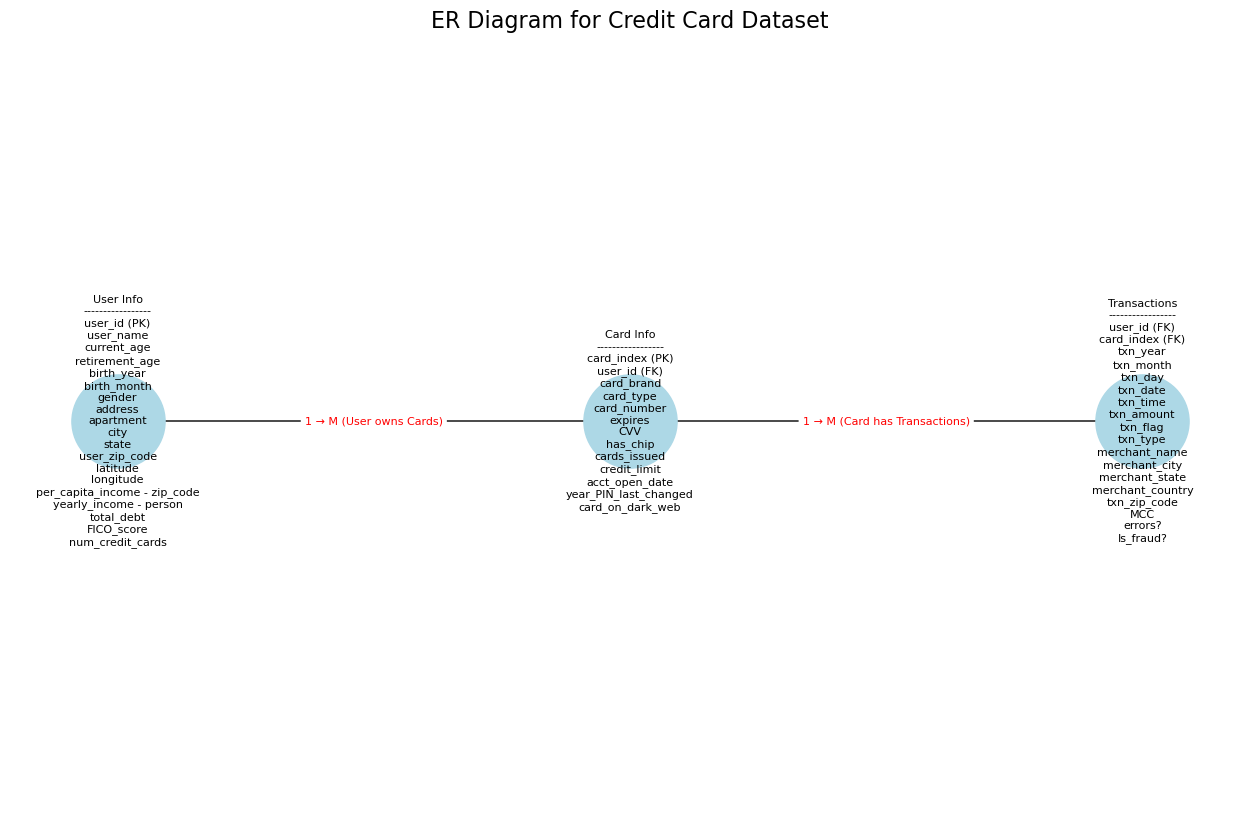

In [119]:
# Initialize directed graph
G = nx.DiGraph()

# --- Updated fields for each table ---
user_fields = """User Info
-----------------
user_id (PK)
user_name
current_age
retirement_age
birth_year
birth_month
gender
address
apartment
city
state
user_zip_code
latitude
longitude
per_capita_income - zip_code
yearly_income - person
total_debt
FICO_score
num_credit_cards"""

card_fields = """Card Info
-----------------
card_index (PK)
user_id (FK)
card_brand
card_type
card_number
expires
CVV
has_chip
cards_issued
credit_limit
acct_open_date
year_PIN_last_changed
card_on_dark_web"""

txn_fields = """Transactions
-----------------
user_id (FK)
card_index (FK)
txn_year
txn_month
txn_day
txn_date
txn_time
txn_amount
txn_flag
txn_type
merchant_name
merchant_city
merchant_state
merchant_country
txn_zip_code
MCC
errors?
Is_fraud?"""

# Add nodes with labels
G.add_node("User Info", label=user_fields)
G.add_node("Card Info", label=card_fields)
G.add_node("Transactions", label=txn_fields)

# Add edges for relationships
G.add_edge("User Info", "Card Info", label="1 → M (User owns Cards)")
G.add_edge("Card Info", "Transactions", label="1 → M (Card has Transactions)")

# --- Draw the graph ---
plt.figure(figsize=(16, 10))
pos = {
    "User Info": (0, 0),
    "Card Info": (1, 0),
    "Transactions": (2, 0)
}

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=4500)

# Draw edges
nx.draw_networkx_edges(G, pos, arrows=True)

# Draw node labels
nx.draw_networkx_labels(G, pos, labels=nx.get_node_attributes(G, 'label'), font_size=8)

# Draw edge labels
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=8)

plt.axis('off')
plt.title("ER Diagram for Credit Card Dataset", fontsize=16)
plt.show()

# 07. Exports

In [120]:
df_transactions.to_pickle(os.path.join(path, '02_Data', 'Prepared Data', 'cc_cleaned_transactions.pkl'))

In [121]:
df_card_info.to_pickle(os.path.join(path, '02_Data', 'Prepared Data', 'cc_cleaned_card.pkl'))

In [122]:
df_user_info.to_pickle(os.path.join(path, '02_Data', 'Prepared Data', 'cc_cleaned_user.pkl'))